## Final Project Submission

Please fill out:
* Student name:   Jeff Munyaka Mogaka
* Student pace:   full time
* Scheduled project review date/time: 
* Instructor name:   William Okomba
* Blog post URL:

## 1.Business Understanding

### Business Problem:

#### The company is looking to diversify by entering the commercial and private aviation industry. However, we lack knowledge about the risks associated with different aircraft

### Goal:

#### Our goal is to analyze historical aviation accident data to identify which aircraft are the lowest risk.And also give recommendations or guidance to their initial aircraft purchasing decisions.

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Understanding

In [3]:
print("Loading the dataset to begin our analysis.....")

df = pd.read_csv('AviationData.csv',encoding='latin-1', low_memory=False)
print()
print("....Dataset loaded successfully......")

Loading the dataset to begin our analysis.....

....Dataset loaded successfully......


In [4]:
print("First 5 Rows of the dataset:")
df.head()

First 5 Rows of the dataset:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
print("Dataset Information: (Columns, Data Types, Non-Null Counts)")
print()
df.info()

Dataset Information: (Columns, Data Types, Non-Null Counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 

In [6]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns as clearly seen above")

The dataset has 88889 rows and 31 columns as clearly seen above


In [7]:
print(f"The columns names associated with the aviation dataset are: \n{df.columns}")

The columns names associated with the aviation dataset are: 
Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [8]:
#Now let's see how much data is missing
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
#Decided to create a dataframe that sorts the columns according to the number of values missing
#and their percentage
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
# Print columns with missing values, sorted
print(f"Below we are be able to see what each column misses in terms of values and percentage: \n{missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)}")

Below we are be able to see what each column misses in terms of values and percentage: 
                        Missing Values  Percentage
Schedule                         76307   85.845268
Air.carrier                      72241   81.271023
FAR.Description                  56866   63.974170
Aircraft.Category                56602   63.677170
Longitude                        54516   61.330423
Latitude                         54507   61.320298
Airport.Code                     38640   43.469946
Airport.Name                     36099   40.611324
Broad.phase.of.flight            27165   30.560587
Publication.Date                 13771   15.492356
Total.Serious.Injuries           12510   14.073732
Total.Minor.Injuries             11933   13.424608
Total.Fatal.Injuries             11401   12.826109
Engine.Type                       7077    7.961615
Report.Status                     6381    7.178616
Purpose.of.flight                 6192    6.965991
Number.of.Engines                 6084    6.8

In [9]:
#Let's look at the statistics of the numerical columns

print("Summary Statistics for Numerical Columns:")
df.describe()

Summary Statistics for Numerical Columns:


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [10]:
#Statistics for the categorical columns
print("Summary statistics of the categorical columns:")
df.describe(include = "O")

Summary statistics of the categorical columns:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001214X45071,Accident,ERA22FA318,2000-07-08,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [11]:
#Checking for duplicates in the dataset
print(f"There are {df.duplicated().sum()} duplicated values in this dataset")

There are 0 duplicated values in this dataset


## 3. Data Preparation

### 1. Data Cleaning

In [12]:
#Made a copy of the original data to clean
df1 = df.copy()

In [13]:
#Current column name formart
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [14]:
#The column names seem to be in different formats...we need to change that
#the names need to have the same format for easy analysis
df1.columns = [name.strip().replace(".", "_").lower() for name in df1.columns]

print(f"The formated column names are: \n{df1.columns}")

The formated column names are: 
Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')


In [15]:
#Get rid of the columns that hold no importance in the analysis

columns_to_drop = ['event_id','accident_number','latitude','longitude','airport_code','airport_name','registration_number','model','aircraft_category'
                   ,'far_description','schedule','air_carrier','report_status','publication_date','broad_phase_of_flight']

df1.drop(columns=columns_to_drop,axis=1,inplace=True)

print(f"There are {len(df1.columns)} remaining columns and they are: \n{df1.columns}")

There are 16 remaining columns and they are: 
Index(['investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'make', 'amateur_built',
       'number_of_engines', 'engine_type', 'purpose_of_flight',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition'],
      dtype='object')


In [16]:
#Get a clear picture of the remaining columns' missing values

print(f"The number of null values in each column and their corresponding datatypes:")

pd.DataFrame({'Null Count':df1.isnull().sum(),'Data Type':df1.dtypes})

The number of null values in each column and their corresponding datatypes:


,Null Count,Data Type
investigation_type,0,object
event_date,0,object
location,52,object
country,226,object
injury_severity,1000,object
aircraft_damage,3194,object
make,63,object
amateur_built,102,object
number_of_engines,6084,float64
engine_type,7077,object


In [17]:
#Change the format of dates under 'event_date' to be in right format
#And also extract the month and year
df1['event_date'] = pd.to_datetime(df1['event_date'])
df1['month'] = df1['event_date'].dt.month
df1['year'] = df1['event_date'].dt.year

In [18]:
#Check the Value counts for each column to know what action to take for the missing values
#Create a function that returns unique values and counts them
def column_value_counts(df,col):
    for i in col:
        print(f"\nColumn Name: {i}")
        print(df[i].value_counts())
        print("------------")
        print()


In [19]:
#Calling the fucntion
column_value_counts(df1,list(df1.columns))


Column Name: investigation_type
Accident    85015
Incident     3874
Name: investigation_type, dtype: int64
------------


Column Name: event_date
1982-05-16    25
1984-06-30    25
2000-07-08    25
1983-06-05    24
1983-08-05    24
              ..
2020-03-23     1
2013-12-10     1
2014-11-06     1
2013-08-19     1
2016-12-22     1
Name: event_date, Length: 14782, dtype: int64
------------


Column Name: location
ANCHORAGE, AK                        434
MIAMI, FL                            200
ALBUQUERQUE, NM                      196
HOUSTON, TX                          193
CHICAGO, IL                          184
                                    ... 
EAGLE CREST, DE                        1
Montrose, MO                           1
LIberia,                               1
Julia Creek, Australia, Australia      1
Keene, CA                              1
Name: location, Length: 27758, dtype: int64
------------


Column Name: country
United States                       82248
Brazil    

In [20]:
#The location columns seems to have different format for every value in each row
#we need to have similar format
#change everything under location to upper
df1['location'] =df1['location'].str.upper()

In [21]:
#The 'injury_severity' column seems to have different format too
#remove the brackets and get the name 'fatal' alone
df1['injury_severity'] = df1['injury_severity'].str.split('(').str[0]

In [22]:
#Reduce the other unique values other than 'fatal' and 'non-fatal' to non-fatal
df1.loc[(df1['injury_severity'] != 'Non-Fatal') & (df1['injury_severity'] != 'Incident'),'injury_severity'] = 'Fatal'
df1.loc[(df1['injury_severity'] == "Incident"), 'injury_severity'] = 'Fatal'
df1['injury_severity'].value_counts()

Non-Fatal    67357
Fatal        21532
Name: injury_severity, dtype: int64

In [23]:
#The column 'make' also has different formatted values...standardize the column
df1['make'] = df1['make'].str.upper()

In [24]:
#The column 'engine_type' also need to be standardized and replace the none,unk to unknown
df1['engine_type'] = df1['engine_type'].str.lower().replace(['unk','none'],'unknown')

In [25]:
#The column 'weather_condition' also need starndadisation
df1['weather_condition'] = df1['weather_condition'].str.upper()

In [26]:
#Now let's look if all the values in each column have been standardized
column_value_counts(df1,list(df1.columns))


Column Name: investigation_type
Accident    85015
Incident     3874
Name: investigation_type, dtype: int64
------------


Column Name: event_date
1982-05-16    25
1984-06-30    25
2000-07-08    25
1983-06-05    24
1983-08-05    24
              ..
2020-03-23     1
2013-12-10     1
2014-11-06     1
2013-08-19     1
2016-12-22     1
Name: event_date, Length: 14782, dtype: int64
------------


Column Name: location
ANCHORAGE, AK        548
MIAMI, FL            275
HOUSTON, TX          271
ALBUQUERQUE, NM      265
CHICAGO, IL          256
                    ... 
FALKNER, MS            1
SOUTH PASS 65, GM      1
DESERT AIRE, WA        1
LAKE HERON, NM         1
STRASBURG, FRANCE      1
Name: location, Length: 21978, dtype: int64
------------


Column Name: country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                  

In [27]:
#The 'year' column needs to be edited
#Remove the years before 1982
df1.sort_values(by='year')
df1 = df1[df1['year']>=1982]
df1 = df1.reset_index(drop=True)

In [28]:
#Filling in the values for the categorical data with 'Unknown'
#While keeping in mind the data already filled as unknown or unk in weather and engine type column
df1['make'].fillna('Unknown',inplace=True)
df1['aircraft_damage'].fillna('Unknown',inplace=True)
df1['purpose_of_flight'].fillna('Unknown',inplace=True)
df1['weather_condition'].fillna('UNK',inplace=True)
df1['engine_type'].fillna('unknown',inplace=True)
df1['injury_severity'].fillna('Unavailable',inplace=True)

In [29]:
#For the numerical the best value to fill the null places is the mode
df1['number_of_engines'].fillna(value=(df1['number_of_engines'].mode()[0]), inplace=True)
df1['total_fatal_injuries'].fillna(value=(df1['total_fatal_injuries'].mode()[0]), inplace=True)
df1['total_serious_injuries'].fillna(value=(df1['total_serious_injuries'].mode()[0]), inplace=True)
df1['total_minor_injuries'].fillna(value=(df1['total_minor_injuries'].mode()[0]), inplace=True)
df1['total_uninjured'].fillna(value=(df1['total_uninjured'].mode()[0]), inplace=True)

In [30]:
#Main focus is on injury severity
#Remove rows which do not have information about injury
df1 = df1[df1['injury_severity'] != 'Unavailable']

In [31]:
#USA contains 93% of this dataset therefore let's focus on it
df1 = df1[df1['country']=='United States']

In [32]:
#Let's see if there are still null values in country
df1.isnull().sum()

investigation_type         0
event_date                 0
location                  11
country                    0
injury_severity            0
aircraft_damage            0
make                       0
amateur_built             21
number_of_engines          0
engine_type                0
purpose_of_flight          0
total_fatal_injuries       0
total_serious_injuries     0
total_minor_injuries       0
total_uninjured            0
weather_condition          0
month                      0
year                       0
dtype: int64

In [33]:
#Amazing....for the location and amateur built let's drop the empty rows
df1.dropna(subset=['location','amateur_built'],inplace=True)

In [34]:
#Clarification of what has been done above
df1.isnull().sum()

investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
make                      0
amateur_built             0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
month                     0
year                      0
dtype: int64

In [35]:
#Engineer a new column that holds values that are either 'fatal' or 'Non fatal'
df1['survival_type'] = df1['injury_severity']
df1['survival_type'].replace(to_replace = ['Incident','Minor','Serious'],value = 'Non-Fatal',inplace = True)

## Exploratory Data Analysis
### 1. Univariate Data Analysis

#### Accident Frequency by Manufacturer

In [36]:
print("Analyzing Accident Frequency by Aircraft Manufacturer....")

make_counts = df1['make'].value_counts()
top_15_make = make_counts.head(15)

print("\nTop 15 Manufacturer by Total Accidents\n")
print(top_15_make)

Analyzing Accident Frequency by Aircraft Manufacturer....

Top 15 Manufacturer by Total Accidents

CESSNA         25842
PIPER          14163
BEECH           5057
BELL            2283
BOEING          1482
MOONEY          1292
GRUMMAN         1142
BELLANCA        1040
ROBINSON         919
HUGHES           874
SCHWEIZER        744
AIR TRACTOR      644
AERONCA          634
MAULE            577
CHAMPION         514
Name: make, dtype: int64


In [37]:
#Combine the 'total_serious_injuries' and 'total_minor_injuries' to a new column and name it 'total_injuries'
#Get rid of the two columns
df1['total_injured'] = df1['total_serious_injuries'] + df1['total_minor_injuries']
del df1['total_serious_injuries']
del df1['total_minor_injuries']

In [38]:
#create a dataframe to hold only for the top 15 make
top_15_make = df1[df1['make'].isin(top_15_make.index.tolist())]
top_15_make

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,make,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_uninjured,weather_condition,month,year,survival_type,total_injured
0,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,CESSNA,No,1.0,reciprocating,Personal,0.0,2.0,VMC,1,1982,Non-Fatal,0.0
1,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,CESSNA,No,2.0,reciprocating,Business,0.0,2.0,IMC,1,1982,Non-Fatal,0.0
3,Accident,1982-01-01,"HOBBS, NM",United States,Non-Fatal,Substantial,PIPER,No,1.0,reciprocating,Personal,0.0,1.0,VMC,1,1982,Non-Fatal,0.0
4,Accident,1982-01-01,"TUSKEGEE, AL",United States,Non-Fatal,Substantial,BEECH,No,1.0,reciprocating,Personal,0.0,1.0,VMC,1,1982,Non-Fatal,0.0
5,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,BELLANCA,No,1.0,reciprocating,Personal,0.0,0.0,IMC,1,1982,Non-Fatal,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88874,Accident,2022-12-21,"AUBURN HILLS, MI",United States,Fatal,Unknown,CESSNA,No,1.0,unknown,Personal,0.0,0.0,UNK,12,2022,Fatal,1.0
88877,Accident,2022-12-26,"ANNAPOLIS, MD",United States,Fatal,Unknown,PIPER,No,1.0,unknown,Personal,0.0,0.0,UNK,12,2022,Fatal,1.0
88878,Accident,2022-12-26,"HAMPTON, NH",United States,Fatal,Unknown,BELLANCA,No,1.0,unknown,Unknown,0.0,0.0,UNK,12,2022,Fatal,0.0
88880,Accident,2022-12-26,"MORGAN, UT",United States,Fatal,Unknown,CESSNA,No,1.0,unknown,Personal,0.0,0.0,UNK,12,2022,Fatal,0.0


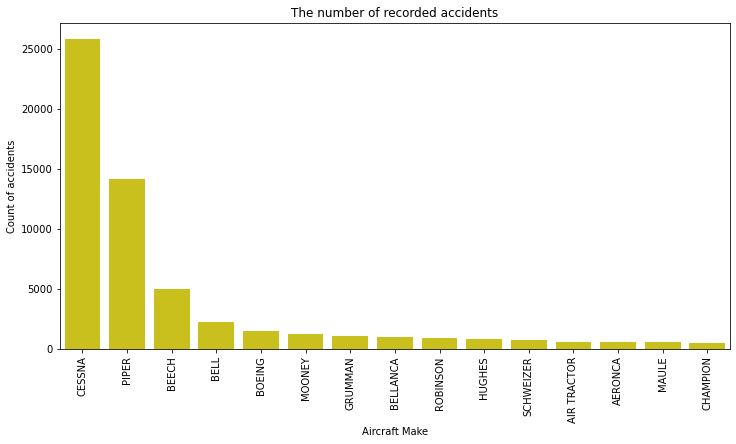

In [39]:
#Plot showing relationship between frequency of accidents occurring and make of the aircraft
plt.figure(figsize=(12, 6))
sns.countplot(x = 'make', order = top_15_make['make'].value_counts().index, color = '#e6d800', data = top_15_make)
plt.title('The number of recorded accidents')
plt.ylabel('Count of accidents') 
plt.xlabel('Aircraft Make')
plt.xticks(rotation=90)
plt.show()

Accident Frequency by Manufacturer
Analysis: This bar chart illustrates the total number of aviation incidents for the top 15 aircraft manufacturers between 1982 and 2022. It is immediately clear that Cessna and Piper have a significantly higher number of incidents compared to all other manufacturers.

Conclusion: The high frequency of incidents for these brands is not necessarily an indicator of poor safety but rather a reflection of their immense popularity and market share. With more of their aircraft in operation, a higher number of incidents is statistically probable.

Recommendation: The company should prioritize well-established and popular manufacturers like Cessna and Piper for initial acquisitions. Their market prevalence ensures a robust ecosystem for maintenance, readily available spare parts, and a larger pool of experienced pilots and mechanics.

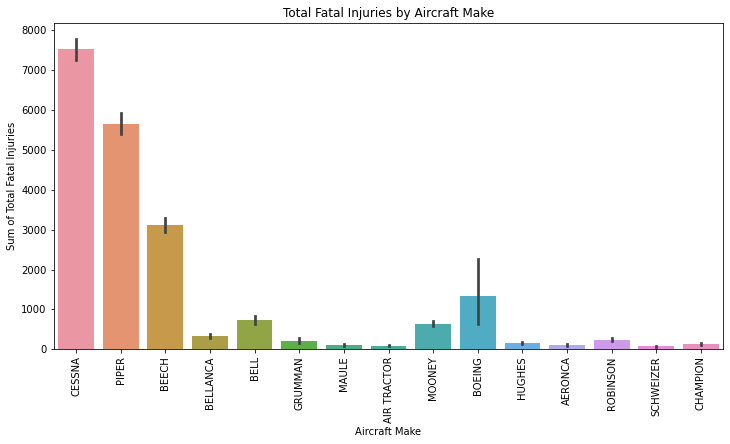

In [40]:
#Plot showing the relationship of Fatal Injuries and the make
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y = 'total_fatal_injuries', data=top_15_make, estimator=sum)
plt.title('Total Fatal Injuries by Aircraft Make')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Aircraft Make')
plt.xticks(rotation=90)
plt.show()

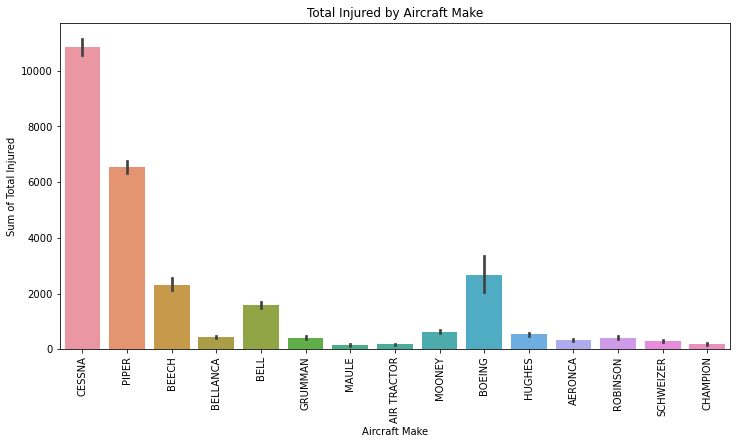

In [41]:
#Plot showing the relationship of Total Injured and the make
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y = 'total_injured', data=top_15_make, estimator=sum)
plt.title('Total Injured by Aircraft Make')
plt.ylabel('Sum of Total Injured') 
plt.xlabel('Aircraft Make')
plt.xticks(rotation=90)
plt.show()

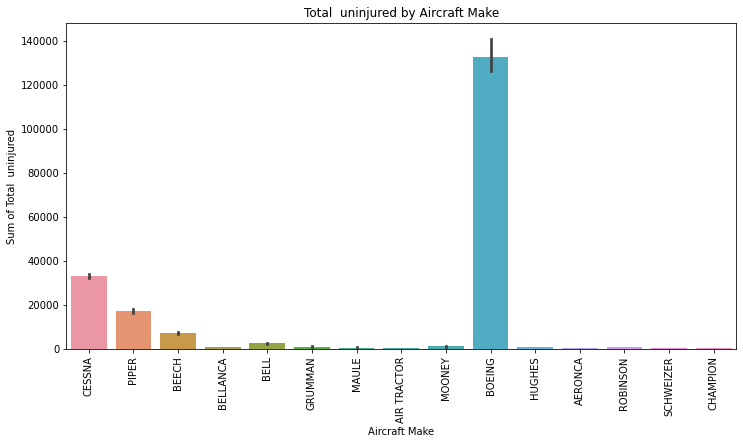

In [42]:
#Plot showing the relationship of Total Uninjured and the make
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y = 'total_uninjured', data=top_15_make, estimator=sum)
plt.title('Total  uninjured by Aircraft Make')
plt.ylabel('Sum of Total  uninjured') 
plt.xlabel('Aircraft Make')
plt.xticks(rotation=90)
plt.show()

#### Accident Frequency by Location

In [43]:
#Create a new column 'state' that contains the name of the state and delete the 'location' column
df1['state'] = df1['location'].str.split(',').str[0]
del df1['location']

In [44]:
print("Analyzing Accident Frequency by State....")

state_counts = df1['state'].value_counts()
top_15_states = state_counts.head(15)

print("\nTop 15 States by Total Accidents\n")
print(top_15_states)

Analyzing Accident Frequency by State....

Top 15 States by Total Accidents

ANCHORAGE       548
HOUSTON         283
MIAMI           283
ALBUQUERQUE     265
CHICAGO         256
FAIRBANKS       246
PHOENIX         224
ATLANTA         210
DENVER          202
LAS VEGAS       197
JACKSONVILLE    197
TUCSON          196
RENO            179
SAN DIEGO       177
COLUMBUS        177
Name: state, dtype: int64


In [45]:
#Filter the data to a variable that only gets the top 15 states
top_15_states = df1[df1['state'].isin(top_15_states.index.tolist())]
top_15_states 

,investigation_type,event_date,country,injury_severity,aircraft_damage,make,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_uninjured,weather_condition,month,year,survival_type,total_injured,state
2,Accident,1982-01-01,United States,Non-Fatal,Substantial,NORTH AMERICAN,No,1.0,reciprocating,Personal,0.0,0.0,IMC,1,1982,Non-Fatal,3.0,JACKSONVILLE
12,Accident,1982-01-02,United States,Non-Fatal,Substantial,SMITH,No,1.0,reciprocating,Personal,0.0,2.0,VMC,1,1982,Non-Fatal,0.0,MIAMI
72,Incident,1982-01-12,United States,Fatal,Unknown,LOCKHEED,No,3.0,turbo fan,Unknown,0.0,149.0,UNK,1,1982,Fatal,0.0,CHICAGO
98,Accident,1982-01-17,United States,Non-Fatal,Destroyed,CESSNA,No,1.0,reciprocating,Instructional,0.0,1.0,VMC,1,1982,Non-Fatal,1.0,ANCHORAGE
122,Accident,1982-01-19,United States,Non-Fatal,Substantial,CANADAIR,No,4.0,turbo prop,Unknown,0.0,6.0,VMC,1,1982,Non-Fatal,0.0,MIAMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88765,Accident,2022-11-10,United States,Fatal,Unknown,BOEING,No,2.0,unknown,Unknown,0.0,147.0,UNK,11,2022,Fatal,1.0,MIAMI
88788,Accident,2022-11-18,United States,Non-Fatal,Minor,ROBINSON HELICOPTER,No,1.0,unknown,Instructional,0.0,3.0,VMC,11,2022,Non-Fatal,0.0,LAS VEGAS
88789,Accident,2022-11-18,United States,Non-Fatal,Substantial,CESSNA,No,1.0,unknown,Instructional,0.0,3.0,VMC,11,2022,Non-Fatal,0.0,LAS VEGAS
88806,Accident,2022-11-22,United States,Non-Fatal,Substantial,SIKORSKY,No,2.0,unknown,Instructional,0.0,4.0,VMC,11,2022,Non-Fatal,0.0,SAN DIEGO


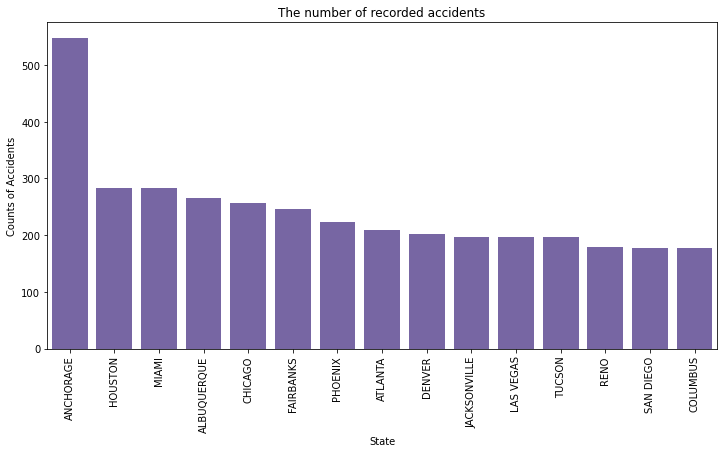

In [46]:
#Plot showing the relationship of frequency of accidents and the state
plt.figure(figsize=(12, 6))
sns.countplot(x = 'state', order = top_15_states['state'].value_counts().index, color = '#725CAD', data = top_15_states)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('State')
plt.title('The number of recorded accidents')
plt.show()

Accidents by State/Location
Analysis: This chart illustrates the locations with the highest number of aviation incidents. Major aviation hubs and areas with challenging terrain or weather, such as Anchorage (Alaska), and high-traffic regions like Miami (Florida) and Houston (Texas), dominate the list.

Conclusion: The operating environment plays a significant role in accident frequency. High-traffic airspace, mountainous terrain, and adverse weather conditions are major contributing factors.

Recommendation: For its initial phase of operations, the company should establish bases in locations with less congested airspace and more favorable flying conditions. This will minimize environmental risk factors and allow the company to build experience in a lower-risk setting.

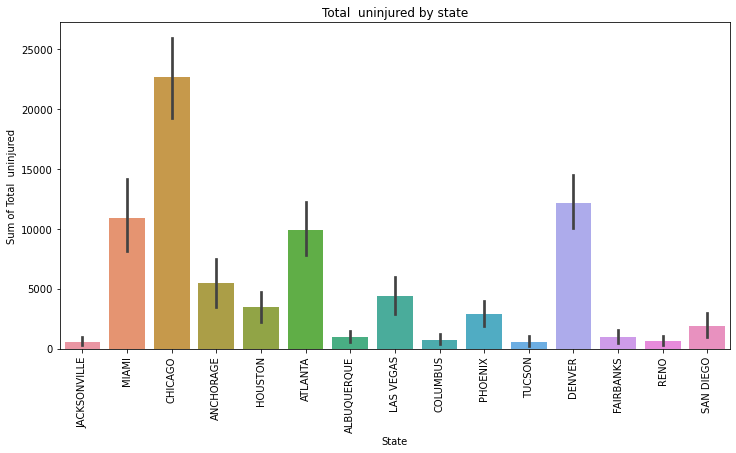

In [47]:
#Plot showing the relationship of Total Uninjured and the state
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  uninjured by state')
plt.ylabel('Sum of Total  uninjured') 
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()

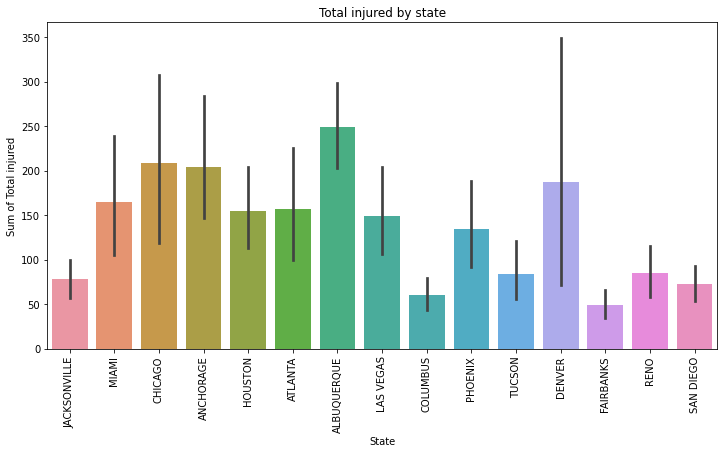

In [48]:
#Plot showing the relationship of Total Injured and the state
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y = 'total_injured', data=top_15_states, estimator=sum)
plt.title('Total injured by state')
plt.ylabel('Sum of Total injured') 
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()

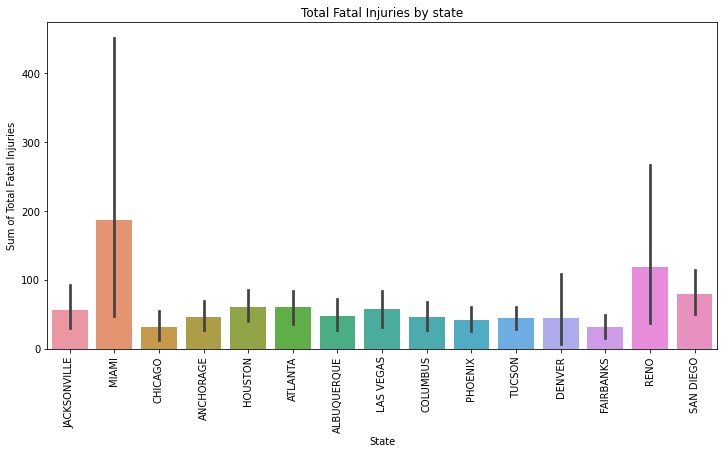

In [49]:
#Plot showing the relationship of Total Fatal Injuries and the state
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by state')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('State')
plt.xticks(rotation=90)
plt.show()

#### Accidents Frequency by month and year

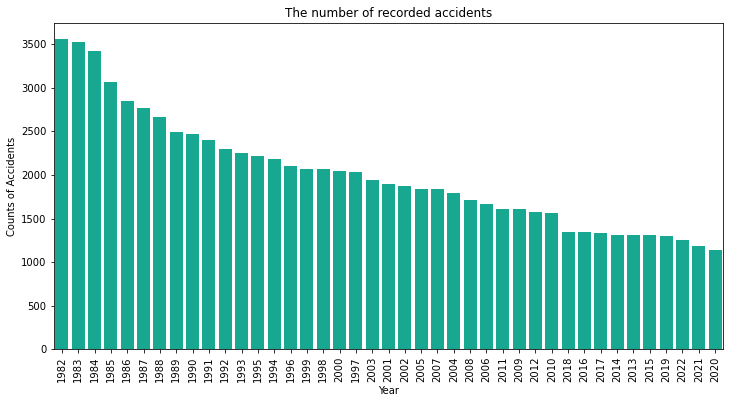

In [50]:
#Accidents frequency by year
plt.figure(figsize=(12, 6))
sns.countplot(x = 'year', order = df1['year'].value_counts().index, color = '#00bfa0', data = df1)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('Year')
plt.title('The number of recorded accidents')
plt.show()

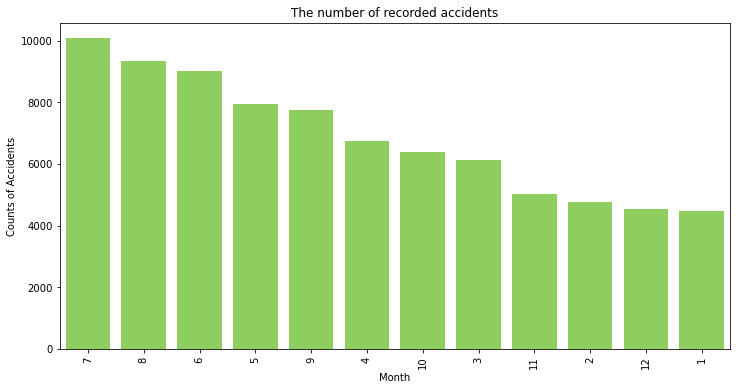

In [51]:
#Accidents frequency by month
plt.figure(figsize=(12, 6))
sns.countplot(x = 'month', order = df1['month'].value_counts().index, color = '#8be04e', data = df1)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('Month')
plt.title('The number of recorded accidents')
plt.show()

Accident Frequency by Year and Month: The accident frequency fluctuates over the years, with some years showing higher counts than others. There also appears to be some seasonality in accidents, with certain months having more occurrences.

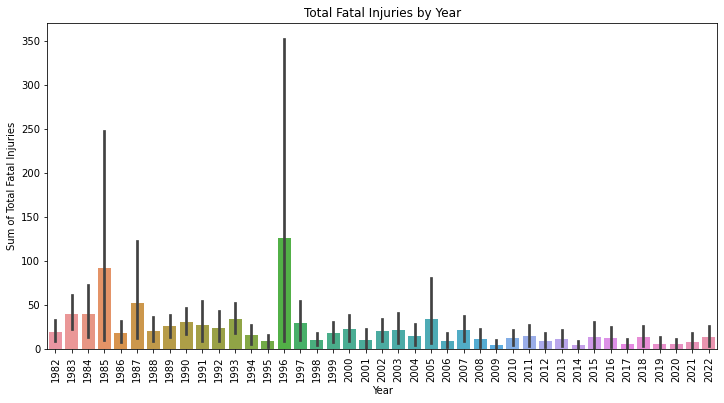

In [52]:
#Plot showing the relationship of Total Fatal Injuries and Year
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by Year')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

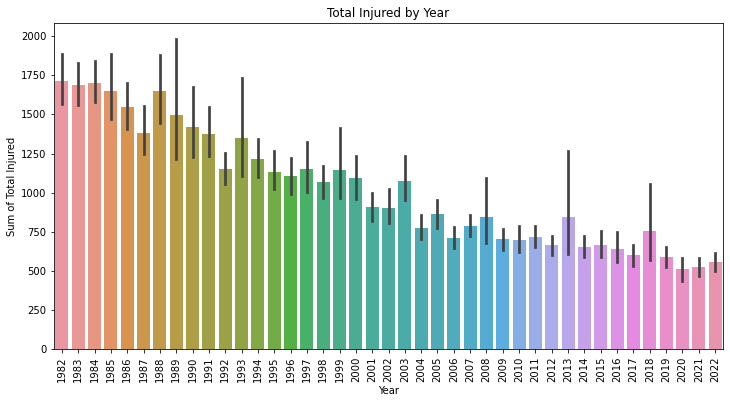

In [53]:
#Plot showing the relationship of Total Injured and Year
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y = 'total_injured', data=df1, estimator=sum)
plt.title('Total Injured by Year')
plt.ylabel('Sum of Total Injured') 
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

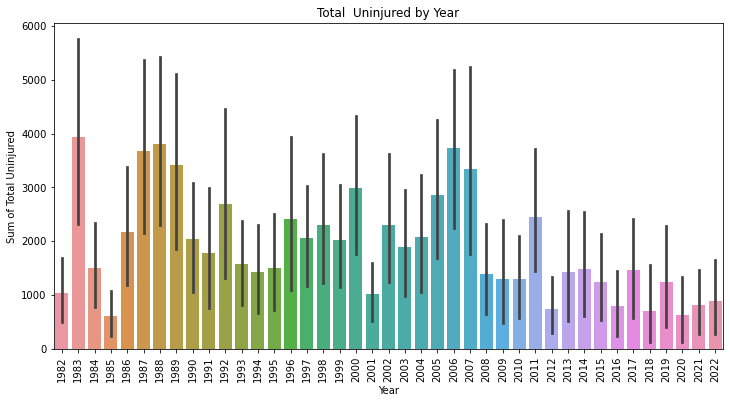

In [54]:
#Plot showing the relationship of Total Uninjured and Year
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  Uninjured by Year')
plt.ylabel('Sum of Total Uninjured') 
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

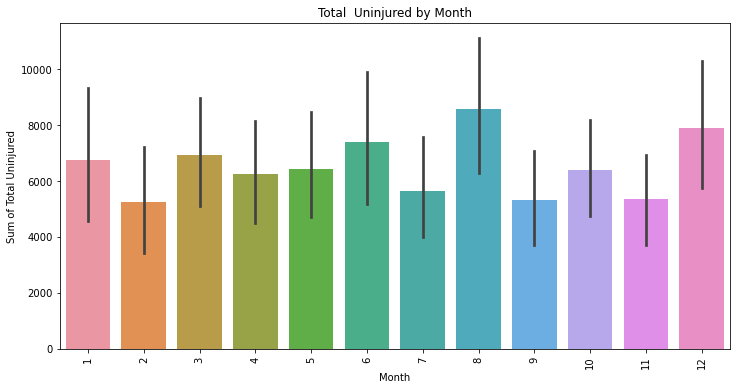

In [55]:
#Plot showing the relationship of Total Uninjured and Month
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  Uninjured by Month')
plt.ylabel('Sum of Total Uninjured') 
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.show()

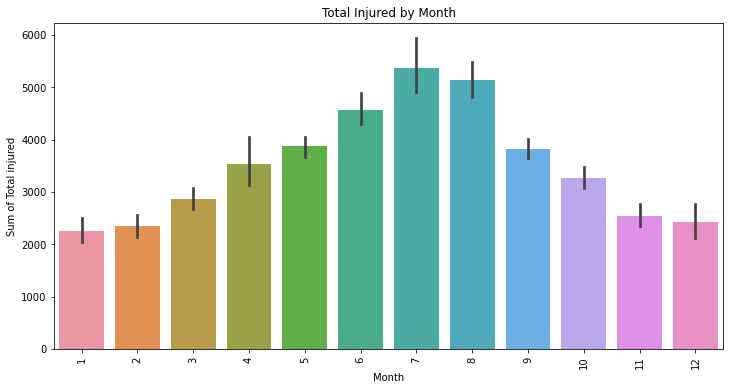

In [56]:
#Plot showing the relationship of Total Injured and Month
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y = 'total_injured', data=df1, estimator=sum)
plt.title('Total Injured by Month')
plt.ylabel('Sum of Total injured') 
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.show()

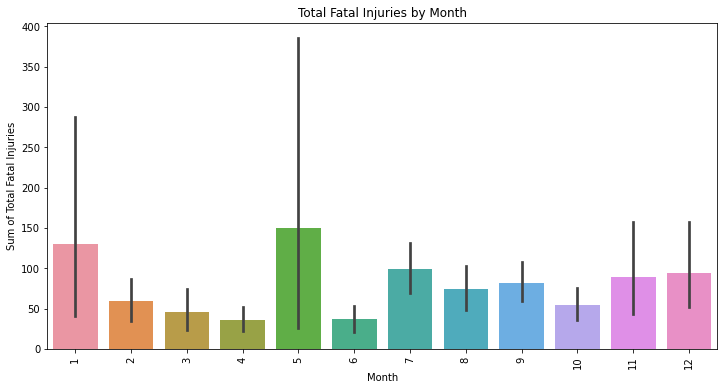

In [57]:
#Plot showing the relationship of Total Fatal Injuries and Month
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by Month')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.show()

#### Accident Frequency by Engine Type

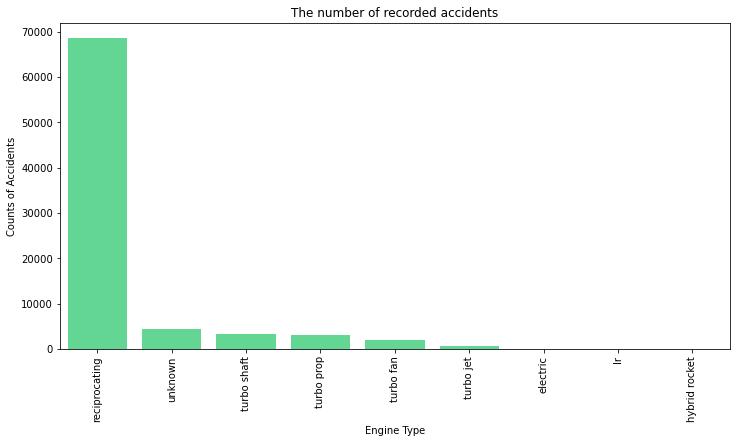

In [58]:
#Plot showing the relationship between frequency of the accidents and Engine Type
plt.figure(figsize=(12, 6))
sns.countplot(x = 'engine_type', order = df1['engine_type'].value_counts().index, color = '#50e991', data = df1)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('Engine Type')
plt.title('The number of recorded accidents')
plt.show()

Accident Frequency and Severity by Engine Type: Aircraft with reciprocating engines are involved in the most accidents, which is expected given their common use. When considering fatalities, aircraft with turbo-fan engines show a high number of uninjured, likely due to the larger capacity and different operational profiles of these aircraft.

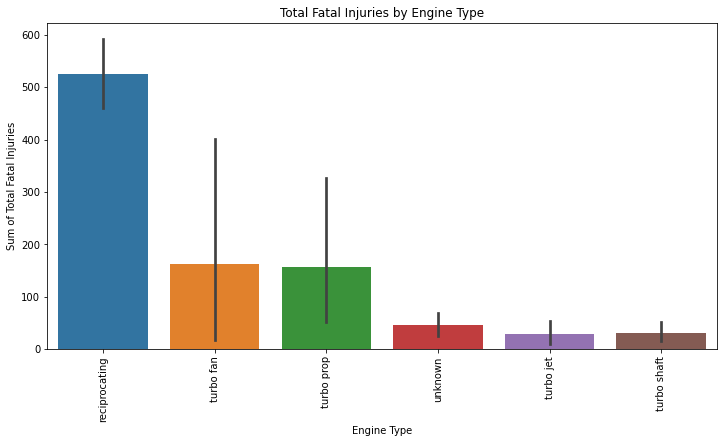

In [59]:
#Plot showing the relationship between Total Fatal Injuries and Engine Type
plt.figure(figsize=(12, 6))
sns.barplot(x='engine_type', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by Engine Type')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Engine Type')
plt.xticks(rotation=90)
plt.show()

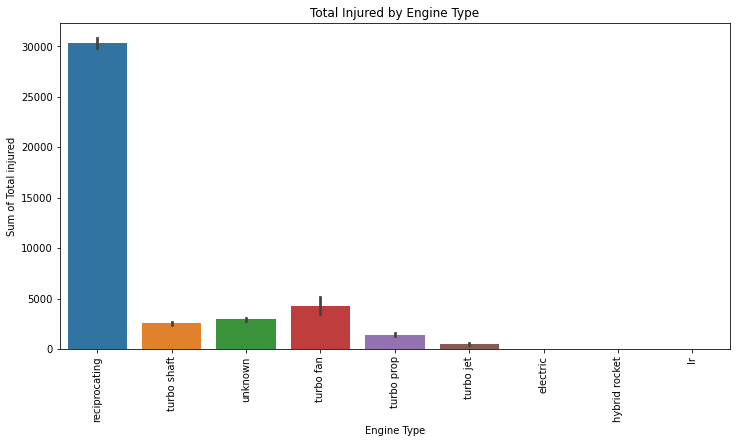

In [60]:
#Plot showing the relationship between Total Injured and Engine Type
plt.figure(figsize=(12, 6))
sns.barplot(x='engine_type', y = 'total_injured', data=df1, estimator=sum)
plt.title('Total Injured by Engine Type')
plt.ylabel('Sum of Total injured') 
plt.xlabel('Engine Type')
plt.xticks(rotation=90)
plt.show()

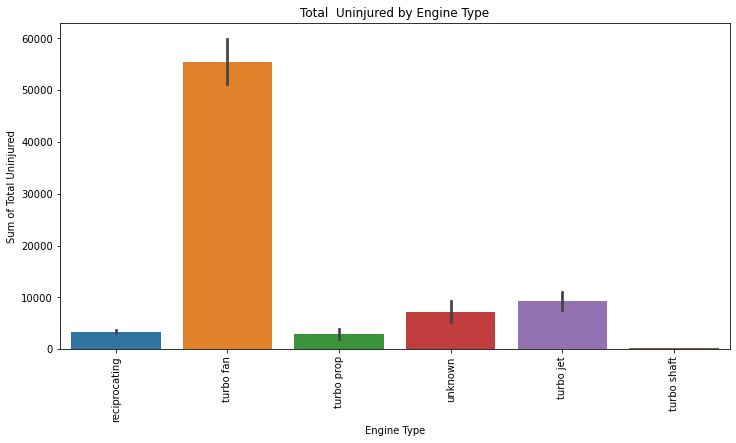

In [61]:
#Plot showing the relationship between Total Uninjured and Engine Type
plt.figure(figsize=(12, 6))
sns.barplot(x='engine_type', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  Uninjured by Engine Type')
plt.ylabel('Sum of Total Uninjured') 
plt.xlabel('Engine Type')
plt.xticks(rotation=90)
plt.show()

#### Accidents by Number of Engines

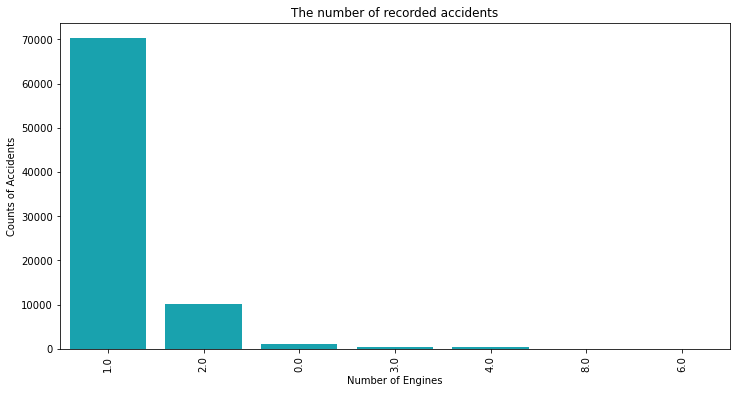

In [62]:
#Plot showing the relationship between frequency of accidents and Number of Engines
plt.figure(figsize=(12, 6))
sns.countplot(x = 'number_of_engines', order = df1['number_of_engines'].value_counts().index, color = '#00b7c7', data = df1)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('Number of Engines')
plt.title('The number of recorded accidents')
plt.show()

Accident Frequency and Severity by Number of Engines: Single-engine aircraft are involved in the vast majority of accidents. However, aircraft with more engines tend to have a higher number of uninjured per accident, which could be related to the type of operations (e.g., commercial flights).

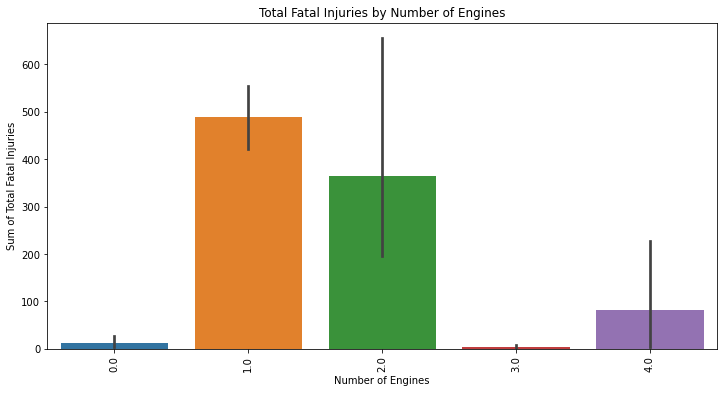

In [63]:
#Plot showing the relationship between Total Fatal Injuries and Number of Engines
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_engines', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by Number of Engines')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Number of Engines')
plt.xticks(rotation=90)
plt.show()

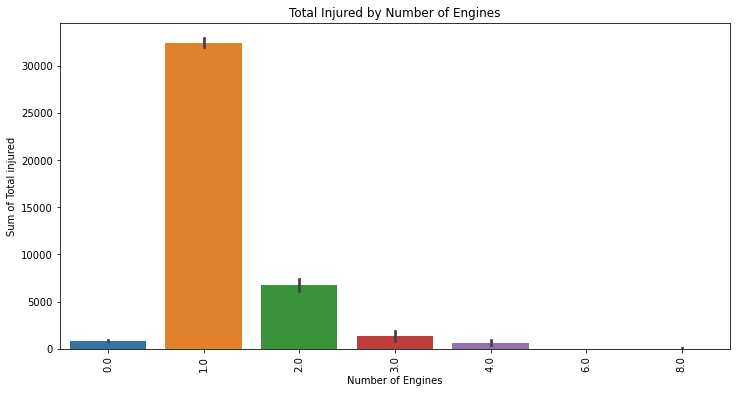

In [64]:
#Plot showing the relationship between Total Injured and Number of Engines
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_engines', y = 'total_injured', data=df1, estimator=sum)
plt.title('Total Injured by Number of Engines')
plt.ylabel('Sum of Total injured') 
plt.xlabel('Number of Engines')
plt.xticks(rotation=90)
plt.show()

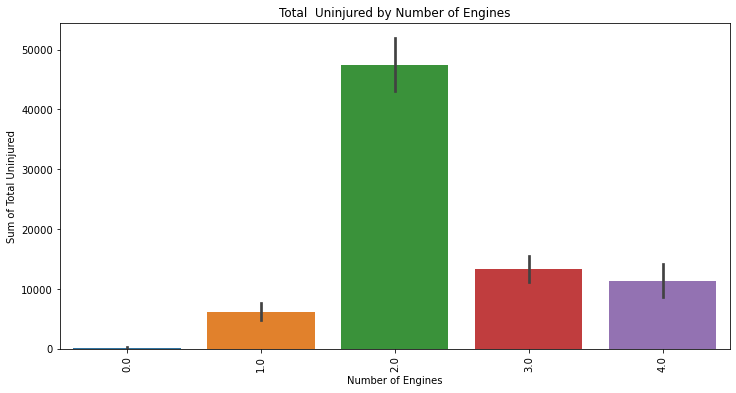

In [65]:
#Plot showing the relationship between Total Uninjured and Number of Engines
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_engines', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  Uninjured by Number of Engines')
plt.ylabel('Sum of Total Uninjured') 
plt.xlabel('Number of Engines')
plt.xticks(rotation=90)
plt.show()

#### Accidents by Weather Condition

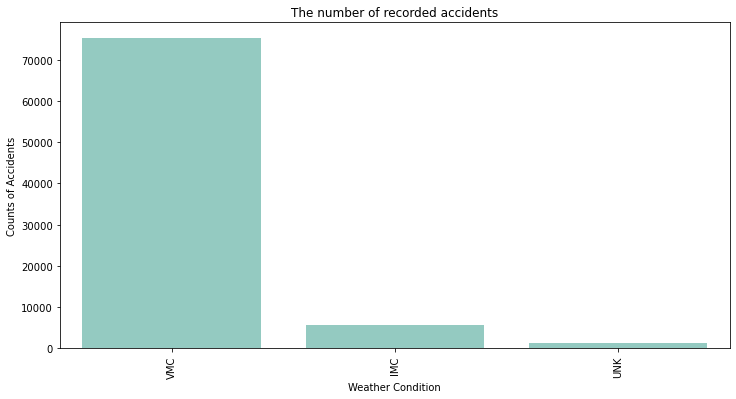

In [66]:
#Plot showing the relationship between frequency of accidents and Weather Condition
plt.figure(figsize=(12, 6))
sns.countplot(x = 'weather_condition', order = df1['weather_condition'].value_counts().index, color = '#8bd3c7', data = df1)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('Weather Condition')
plt.title('The number of recorded accidents')
plt.show()

Accidents by Weather Condition
Analysis: This chart shows the frequency of accidents under different weather conditions. The overwhelming majority of incidents occur in VMC (Visual Meteorological Conditions), with a much smaller number occurring in IMC (Instrument Meteorological Conditions).

Conclusion: While counterintuitive, the higher number of accidents in VMC is due to the simple fact that most flying occurs in good weather. However, the rate of accidents in IMC is likely much higher and more severe.

Recommendation: The company should invest heavily in advanced avionics and rigorous instrument flight training for its pilots to ensure a high level of proficiency and safety when operating in challenging IMC, thereby mitigating this higher-risk category of flight.

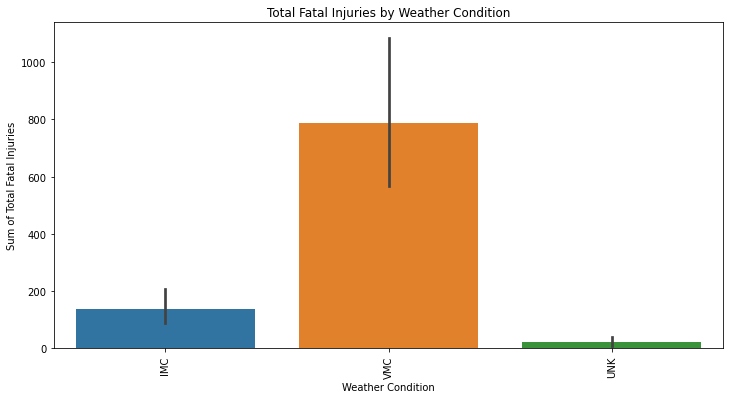

In [67]:
#Plot showing the relationship between Total Fatal Injuries and Weather Condition
plt.figure(figsize=(12, 6))
sns.barplot(x='weather_condition', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by Weather Condition')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Weather Condition')
plt.xticks(rotation=90)
plt.show()

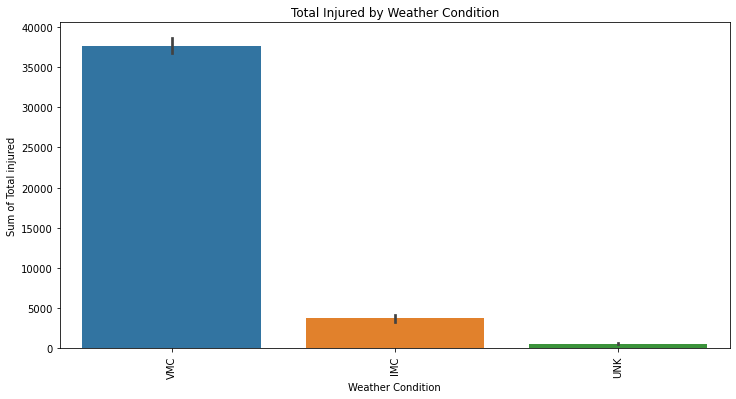

In [68]:
#Plot showing the relationship between Total Injured and Weather Condition
plt.figure(figsize=(12, 6))
sns.barplot(x='weather_condition', y = 'total_injured', data=df1, estimator=sum)
plt.title('Total Injured by Weather Condition')
plt.ylabel('Sum of Total injured') 
plt.xlabel('Weather Condition')
plt.xticks(rotation=90)
plt.show()

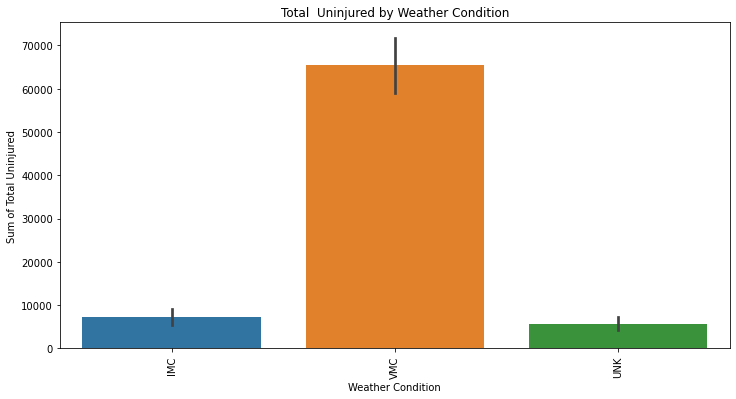

In [69]:
#Plot showing the relationship between Total Uninjured and Weather Condition
plt.figure(figsize=(12, 6))
sns.barplot(x='weather_condition', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  Uninjured by Weather Condition')
plt.ylabel('Sum of Total Uninjured') 
plt.xlabel('Weather Condition')
plt.xticks(rotation=90)
plt.show()

#### Accidents by Amateur Built

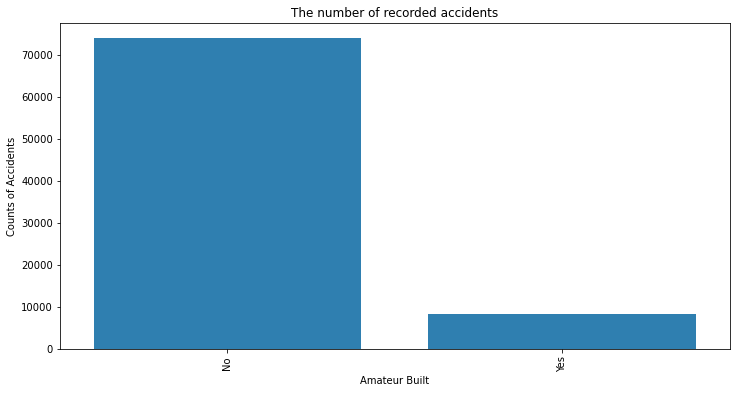

In [70]:
#Plot showing the relationship between frequency of accidents and Amateur Built
plt.figure(figsize=(12, 6))
sns.countplot(x = 'amateur_built', order = df1['amateur_built'].value_counts().index, color = '#1984c5', data = df1)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('Amateur Built')
plt.title('The number of recorded accidents')
plt.show()

Accident Frequency and Severity by Amateur Built: Non-amateur built aircraft are involved in significantly more accidents compared to Amateur.

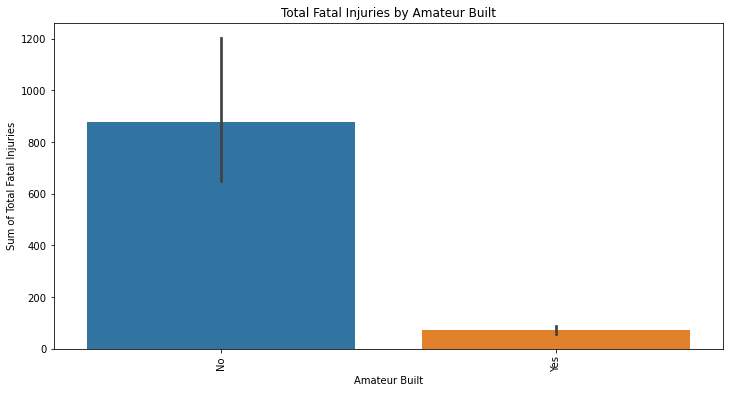

In [71]:
#Plot showing the relationship between Total Fatal Injuries and Amateur Built
plt.figure(figsize=(12, 6))
sns.barplot(x='amateur_built', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by Amateur Built')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Amateur Built')
plt.xticks(rotation=90)
plt.show()

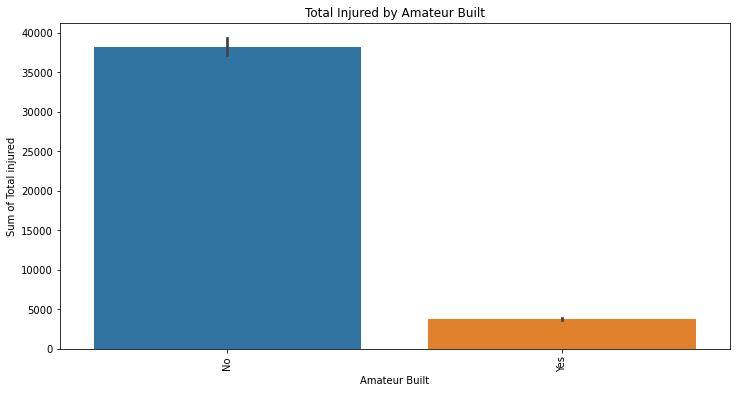

In [72]:
#Plot showing the relationship between Total Injured and Amateur Built
plt.figure(figsize=(12, 6))
sns.barplot(x='amateur_built', y = 'total_injured', data=df1, estimator=sum)
plt.title('Total Injured by Amateur Built')
plt.ylabel('Sum of Total injured') 
plt.xlabel('Amateur Built')
plt.xticks(rotation=90)
plt.show()

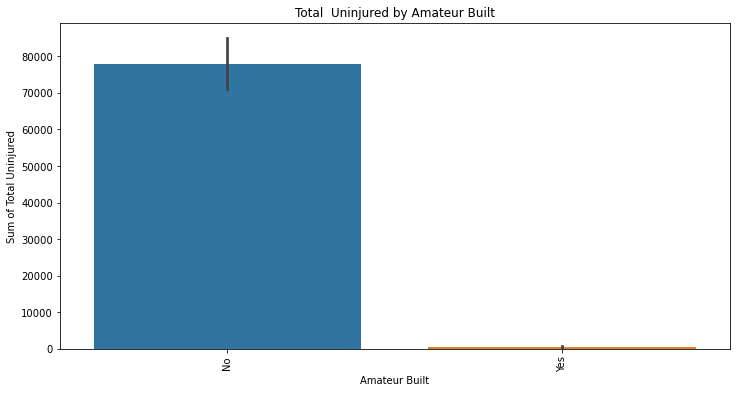

In [73]:
#Plot showing the relationship between Total Uninjured and Amateur Built
plt.figure(figsize=(12, 6))
sns.barplot(x='amateur_built', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  Uninjured by Amateur Built')
plt.ylabel('Sum of Total Uninjured') 
plt.xlabel('Amateur Built')
plt.xticks(rotation=90)
plt.show()

#### Accidents by Aircraft Damage

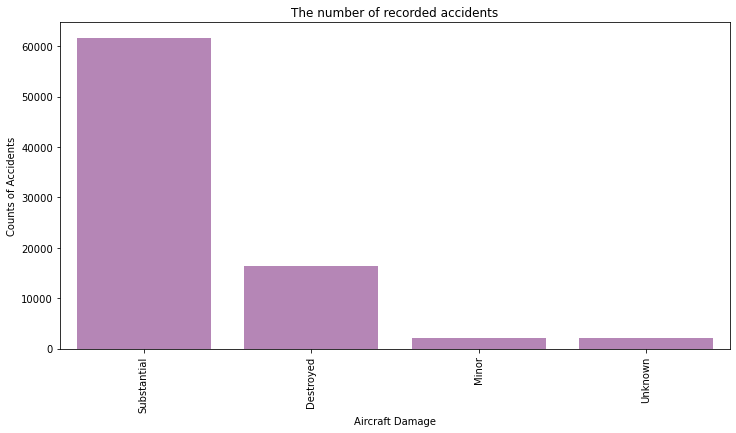

In [74]:
#Plot showing the relationship between frequency of accidents and Aircraft Damage
plt.figure(figsize=(12, 6))
sns.countplot(x = 'aircraft_damage', order = df1['aircraft_damage'].value_counts().index, color = '#bd7ebe', data = df1)
plt.xticks(rotation=90)
plt.ylabel('Counts of Accidents') 
plt.xlabel('Aircraft Damage')
plt.title('The number of recorded accidents')
plt.show()

Accidents by Aircraft Damage
Analysis: This chart categorizes incidents by the level of damage sustained by the aircraft. "Substantial" damage is the most frequent outcome, followed by "Destroyed."

Conclusion: A high proportion of incidents result in significant damage to the aircraft, indicating that even non-fatal events can lead to major financial losses.

Recommendation: The company should prioritize aircraft models with a documented history of requiring only "Minor" damage in incidents. This suggests a more robust and resilient airframe, which translates to lower repair costs and less downtime.

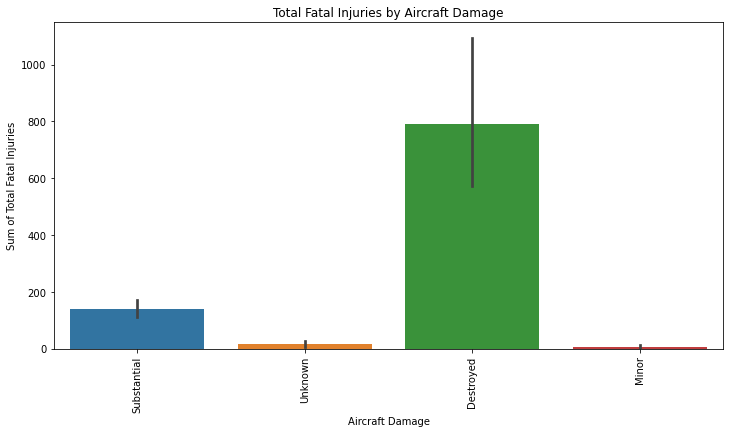

In [75]:
#Plot showing the relationship between Total Fatal Injuries and Aircraft Damage
plt.figure(figsize=(12, 6))
sns.barplot(x='aircraft_damage', y = 'total_fatal_injuries', data=top_15_states, estimator=sum)
plt.title('Total Fatal Injuries by Aircraft Damage')
plt.ylabel('Sum of Total Fatal Injuries') 
plt.xlabel('Aircraft Damage')
plt.xticks(rotation=90)
plt.show()

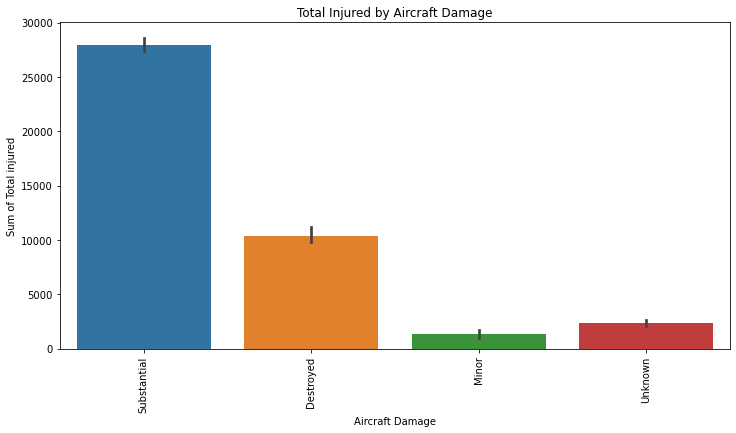

In [76]:
#Plot showing the relationship between Total Injured and Aircraft Damage
plt.figure(figsize=(12, 6))
sns.barplot(x='aircraft_damage', y = 'total_injured', data=df1, estimator=sum)
plt.title('Total Injured by Aircraft Damage')
plt.ylabel('Sum of Total injured') 
plt.xlabel('Aircraft Damage')
plt.xticks(rotation=90)
plt.show()

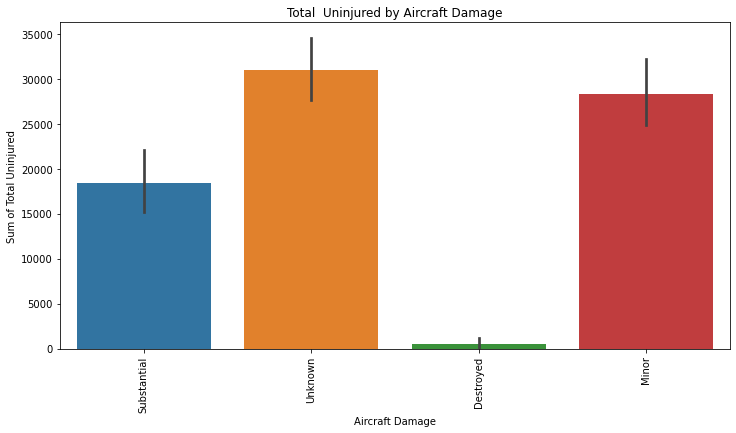

In [77]:
#Plot showing the relationship between Total Uninjured and Aircraft Damage
plt.figure(figsize=(12, 6))
sns.barplot(x='aircraft_damage', y = 'total_uninjured', data=top_15_states, estimator=sum)
plt.title('Total  Uninjured by Aircraft Damage')
plt.ylabel('Sum of Total Uninjured') 
plt.xlabel('Aircraft Damage')
plt.xticks(rotation=90)
plt.show()

 Findings from Injury-Related Graphs (Fatal, Injured, and Uninjured)
Analysis: When comparing the bar charts for "Total Fatal Injuries," "Total Injured," and "Total Uninjured" by manufacturer, a clear pattern emerges: the same manufacturers, primarily Cessna and Piper, consistently appear at the top of each list.

Conclusion: This consistency across all outcome types (negative, neutral, and positive) strongly indicates that the high numbers are a function of market share and high volume of use, not inherently poor safety. If a manufacturer's aircraft are involved in more incidents, they will naturally have higher counts in every category, including uninjured survivors. Relying on these raw totals alone could lead to the incorrect conclusion that the most popular brands are the most dangerous.

Recommendation: This finding is critical because it validates the core recommendation to shift from analyzing absolute numbers to analyzing rates and proportions. To find the lowest-risk aircraft, the company must prioritize metrics such as "Fatalities per Incident," "Injuries per Incident," and "Percentage of Occupants Uninjured." This normalized approach removes the bias of popularity and reveals the true safety performance and survivability of each aircraft model.

### 2. Bivariate Analysis

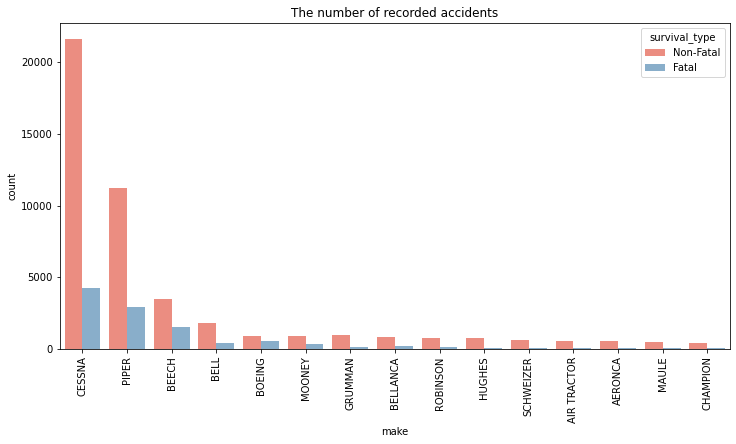

In [78]:
#Plot showing the relationship between frequency of accidents and the occurrence of the survive types
plt.figure(figsize=(12, 6))
sns.countplot(x = 'make', order = top_15_make['make'].value_counts().index, hue = 'survival_type', palette= [ '#fd7f6f', '#7eb0d5'], data = top_15_make)
plt.xticks(rotation=90)
plt.title('The number of recorded accidents')
plt.xticks(rotation=90);

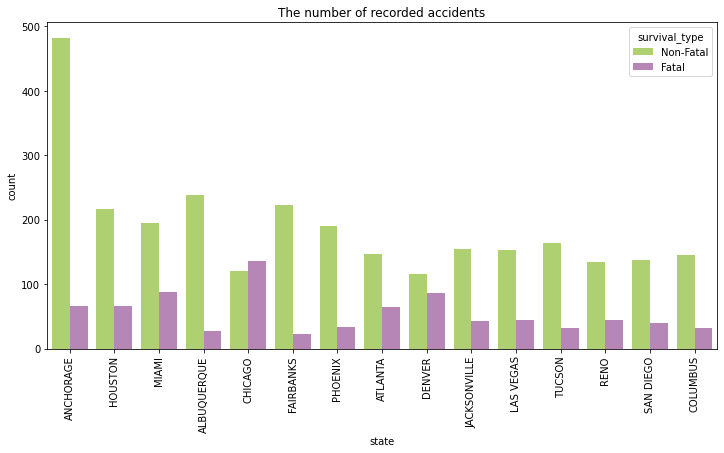

In [79]:
#Plot showing the relationship between state and the occurrence of the survive types
plt.figure(figsize=(12, 6))
sns.countplot(x = 'state', order = top_15_states['state'].value_counts().index, hue = 'survival_type', palette= [ '#b2e061', '#bd7ebe'], data = top_15_states)
plt.xticks(rotation=90)
plt.title('The number of recorded accidents')
plt.xticks(rotation=90);

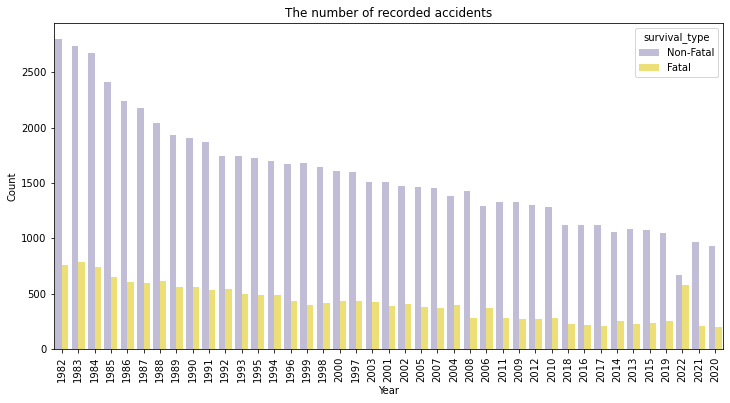

In [80]:
#Plot showing the relationship between year and the occurrence of the survive types
plt.figure(figsize=(12, 6))
sns.countplot(x = 'year', order = df1['year'].value_counts().index, data=df1, hue = 'survival_type', palette= [ '#beb9db', '#ffee65'])
plt.xlabel('Year')
plt.ylabel ('Count')
plt.title('The number of recorded accidents')
plt.xticks(rotation=90);

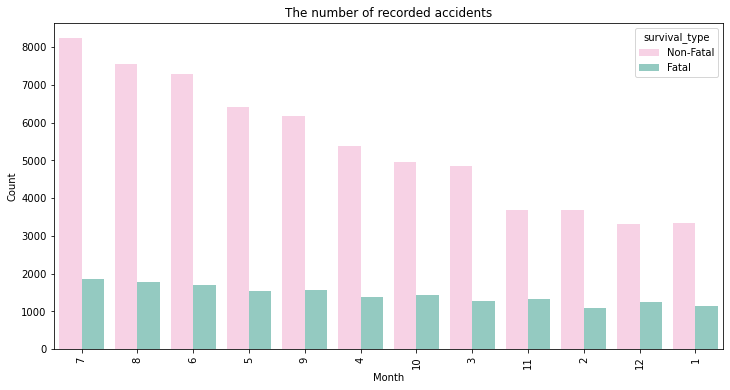

In [81]:
#Plot showing the relationship between Month and the occurrence of the survive types
plt.figure(figsize=(12, 6))
sns.countplot(x = 'month', order = df1['month'].value_counts().index, data=df1, hue = 'survival_type', palette= [ '#fdcce5', '#8bd3c7'])
plt.xlabel('Month')
plt.ylabel ('Count')
plt.title('The number of recorded accidents')
plt.xticks(rotation=90);

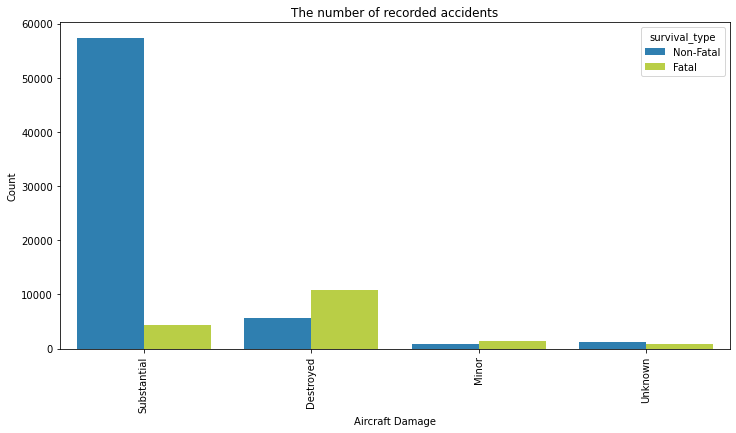

In [82]:
#Plot showing the relationship between Aircraft Damage and the occurrence of the survive types
plt.figure(figsize=(12, 6))
sns.countplot(x = 'aircraft_damage', order = df1['aircraft_damage'].value_counts().index, data=df1, hue = 'survival_type', palette= [ '#1984c5', '#c9e52f'])
plt.xlabel('Aircraft Damage')
plt.ylabel ('Count')
plt.title('The number of recorded accidents')
plt.xticks(rotation=90);

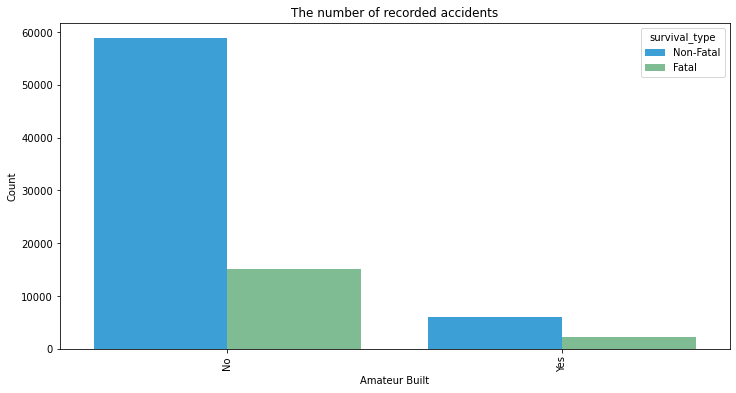

In [83]:
#Plot showing the relationship between Amateur Built and the occurrence of the survive types
plt.figure(figsize=(12, 6))
sns.countplot(x = 'amateur_built', order = df1['amateur_built'].value_counts().index, data=df1, hue = 'survival_type', palette= [ '#22a7f0', '#76c68f'])
plt.xlabel('Amateur Built')
plt.ylabel ('Count')
plt.title('The number of recorded accidents')
plt.xticks(rotation=90);

Accidents by Amateur-Built vs. Survival Type
Analysis: This chart compares the incident outcomes for aircraft designated as "Amateur-Built" versus those that are not. While non-amateur-built aircraft have more incidents overall (due to their volume), the chart shows that amateur-built aircraft are still a notable category within the dataset.

Conclusion: Commercially manufactured aircraft are subject to rigorous and standardized certification processes (like FAA Part 23) that do not apply to amateur-built planes. This ensures a higher and more consistent standard of safety and reliability.

Recommendation: The company must adopt a strict policy to exclusively purchase commercially manufactured aircraft. The acquisition of amateur-built or "experimental" aircraft should be prohibited due to their less stringent certification and oversight, which introduces unnecessary liability and risk.

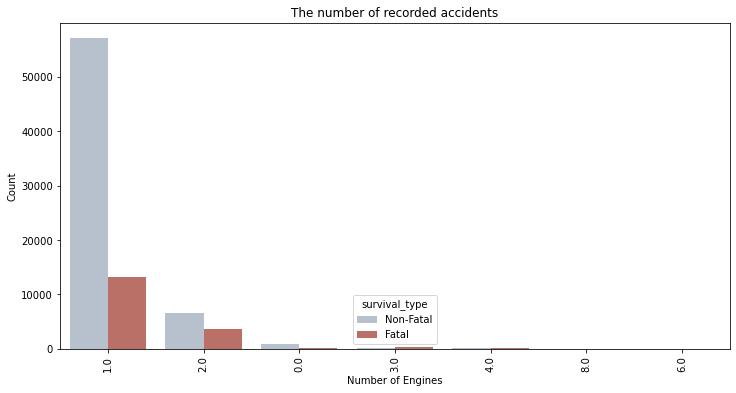

In [84]:
#Plot showing the relationship between Number of Engines and the occurrence of the survive types
plt.figure(figsize=(12, 6))
sns.countplot(x = 'number_of_engines', order = df1['number_of_engines'].value_counts().index, data=df1, hue = 'survival_type', palette= [ '#b3bfd1', '#c86558'])
plt.xlabel('Number of Engines')
plt.ylabel ('Count')
plt.title('The number of recorded accidents')
plt.xticks(rotation=90);

Accidents by Number of Engines vs. Survival Type
Analysis: This chart clearly demonstrates that single-engine aircraft are involved in a vastly higher number of both fatal and non-fatal incidents compared to multi-engine aircraft.

Conclusion: Multi-engine aircraft have a demonstrably better safety profile. The redundancy of having a second engine is a critical safety advantage in the event of an engine failure.

Recommendation: To minimize operational risk, the company should exclusively focus on acquiring multi-engine aircraft for its initial commercial and private enterprise fleet.

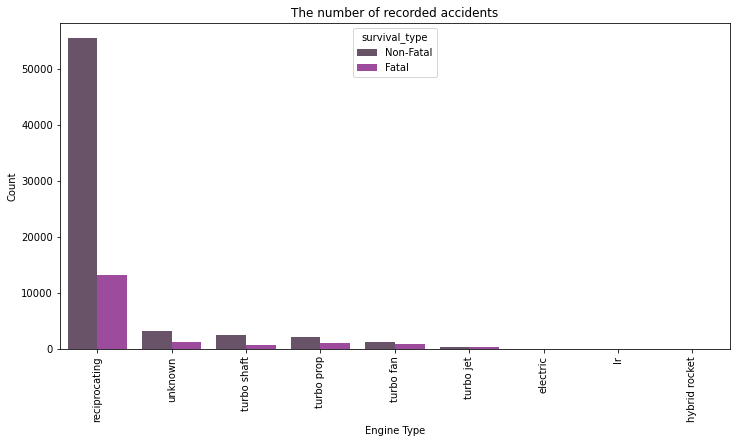

In [85]:
#Plot showing the relationship between Engine Type and the occurrence of the survive types
plt.figure(figsize=(12, 6))
sns.countplot(x = 'engine_type', order = df1['engine_type'].value_counts().index, data=df1, hue = 'survival_type', palette= [ '#6b506b', '#ab3da9'])
plt.xlabel('Engine Type')
plt.ylabel ('Count')
plt.title('The number of recorded accidents')
plt.xticks(rotation=90);

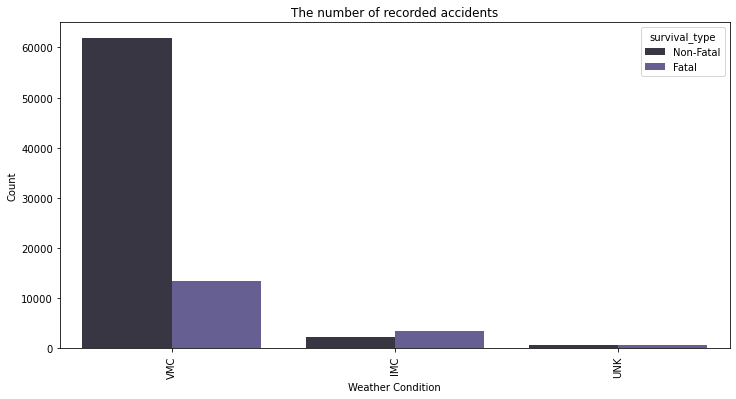

In [86]:
#Plot showing the relationship between Weather Condition and the occurrence of the survive types
plt.figure(figsize=(12, 6))
sns.countplot(x = 'weather_condition', order = df1['weather_condition'].value_counts().index, data=df1, hue = 'survival_type', palette= [ '#363445', '#5e569b'])
plt.xlabel('Weather Condition')
plt.ylabel ('Count')
plt.title('The number of recorded accidents')
plt.xticks(rotation=90);

### 3. Multivariate Analysis

-------Generating Heatmap-------


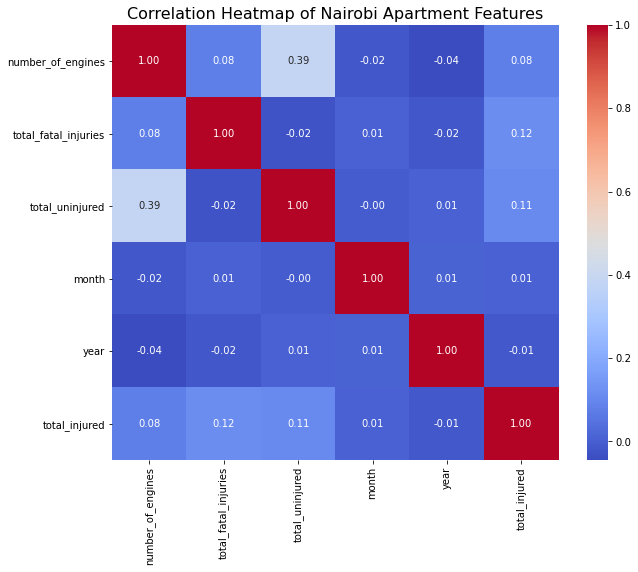

In [87]:
print("-------Generating Heatmap-------")
correlation_matrix = df1.corr()

plt.figure(figsize=(10,8))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    
    fmt='.2f'
)

plt.title('Correlation Heatmap of Nairobi Apartment Features', fontsize=16)
plt.show()

Correlation Heatmap
Analysis: The heatmap visualizes the correlation between numerical features in the dataset. There is a moderate positive correlation between the number of engines and the total number of uninjured passengers. There is also a slight positive correlation between the year of the incident and the number of uninjured passengers.

Conclusion: The correlation between engines and uninjured passengers supports the finding that multi-engine aircraft are safer. The weak correlation between the year and uninjured passengers suggests a slight trend towards increased survivability in more modern aircraft, likely due to improved safety features and regulations.

Recommendation: This data reinforces the primary recommendations. The company should focus on modern, multi-engine aircraft, which the data suggests offer better survivability outcomes in the event of an incident.

In [88]:
#Let's update our original dataframe with the cleaned copy
df = df1.copy()

In [89]:
#Affirmations by printing the first 5
df.head()

,investigation_type,event_date,country,injury_severity,aircraft_damage,make,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_uninjured,weather_condition,month,year,survival_type,total_injured,state
0,Accident,1982-01-01,United States,Non-Fatal,Substantial,CESSNA,No,1.0,reciprocating,Personal,0.0,2.0,VMC,1,1982,Non-Fatal,0.0,PULLMAN
1,Accident,1982-01-01,United States,Non-Fatal,Substantial,CESSNA,No,2.0,reciprocating,Business,0.0,2.0,IMC,1,1982,Non-Fatal,0.0,EAST HANOVER
2,Accident,1982-01-01,United States,Non-Fatal,Substantial,NORTH AMERICAN,No,1.0,reciprocating,Personal,0.0,0.0,IMC,1,1982,Non-Fatal,3.0,JACKSONVILLE
3,Accident,1982-01-01,United States,Non-Fatal,Substantial,PIPER,No,1.0,reciprocating,Personal,0.0,1.0,VMC,1,1982,Non-Fatal,0.0,HOBBS
4,Accident,1982-01-01,United States,Non-Fatal,Substantial,BEECH,No,1.0,reciprocating,Personal,0.0,1.0,VMC,1,1982,Non-Fatal,0.0,TUSKEGEE


In [91]:
df.to_csv("Aviation_Data_Cleaned.csv",index=False)